# Fase 1: Exploración y Limpieza

## Exploración Inicial

In [2]:
#instalar librerías 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# para visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None) 

# gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

# carga del archivo
df_salud = pd.read_csv('datos_salud_habitos.csv')

In [3]:
#printeo las columnas del df
print(df_salud.columns)

Index(['ID', 'Edad', 'Genero', 'IMC', 'Nivel_Actividad', 'Consumo_Alcohol',
       'Fumador', 'Presion_Sistolica', 'Presion_Diastolica', 'Colesterol',
       'Glucosa', 'Horas_Sueno', 'Pasos_Diarios', 'Satisfaccion_Vida',
       'Enfermedad_Cronica'],
      dtype='object')


In [4]:
#muestro el número de filas y columnas del df
print("Shape:", df_salud.shape)

Shape: (1200, 15)


In [5]:
#muestro las 5 primeras filas del df
print(df_salud.head())

    ID  Edad    Genero    IMC Nivel_Actividad Consumo_Alcohol Fumador  \
0  1.0  56.0  Femenino  37.10            Alto           Nunca      No   
1  2.0  69.0  Femenino  22.53        Moderado       Ocasional      No   
2  3.0  46.0  Femenino  20.46            Bajo       Frecuente     NaN   
3  4.0  32.0      Otro  23.93        Moderado           Nunca      No   
4  NaN  60.0  Femenino  19.26            Bajo       Frecuente      No   

   Presion_Sistolica  Presion_Diastolica Colesterol  Glucosa  Horas_Sueno  \
0              157.0                82.0   Muy Alto    110.3          NaN   
1              167.0                69.0   Muy Alto     81.2          NaN   
2              167.0                 NaN     Normal     81.8          9.8   
3              105.0               111.0       Alto    190.0          8.2   
4              160.0                84.0        NaN    159.6          4.4   

   Pasos_Diarios  Satisfaccion_Vida Enfermedad_Cronica  
0            NaN                8.0      

In [6]:
#printeo las 5 últimas filas del df
print(df_salud.tail())

          ID  Edad     Genero    IMC Nivel_Actividad Consumo_Alcohol Fumador  \
1195  1196.0  78.0  Masculino  18.00             NaN       Ocasional      No   
1196  1197.0  69.0  Masculino  29.24            Alto           Nunca     NaN   
1197  1198.0  32.0  Masculino    NaN            Bajo       Ocasional      No   
1198  1199.0  64.0  Masculino  24.08            Alto           Nunca      No   
1199  1200.0  73.0        NaN  33.55            Alto       Frecuente     NaN   

      Presion_Sistolica  Presion_Diastolica Colesterol  Glucosa  Horas_Sueno  \
1195              155.0                68.0   Muy Alto    112.8          8.8   
1196              114.0               115.0     Normal    146.4          9.4   
1197              162.0                82.0   Muy Alto    180.1          7.7   
1198              116.0                94.0   Muy Alto      NaN          4.0   
1199                NaN                 NaN       Alto     72.3          5.1   

      Pasos_Diarios  Satisfaccion_Vida

In [7]:
#muestro la información básica del df
print(df_salud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1080 non-null   float64
 1   Edad                1080 non-null   float64
 2   Genero              1080 non-null   object 
 3   IMC                 1080 non-null   float64
 4   Nivel_Actividad     1080 non-null   object 
 5   Consumo_Alcohol     1080 non-null   object 
 6   Fumador             1080 non-null   object 
 7   Presion_Sistolica   1080 non-null   float64
 8   Presion_Diastolica  1080 non-null   float64
 9   Colesterol          1080 non-null   object 
 10  Glucosa             1080 non-null   float64
 11  Horas_Sueno         1080 non-null   float64
 12  Pasos_Diarios       1080 non-null   float64
 13  Satisfaccion_Vida   1080 non-null   float64
 14  Enfermedad_Cronica  1080 non-null   object 
dtypes: float64(9), object(6)
memory usage: 140.8+ KB
None


In [8]:
#printeo las estadísticas básicas del df y las transpongo
print(df_salud.describe().T)

                     count          mean          std     min       25%  \
ID                  1080.0    597.482407   346.386325     1.0   293.750   
Edad                1080.0     49.597222    18.087774    18.0    34.000   
IMC                 1080.0     29.179704     6.297420    18.0    23.995   
Presion_Sistolica   1080.0    135.182407    26.141929    90.0   112.000   
Presion_Diastolica  1080.0     89.352778    17.043057    60.0    75.000   
Glucosa             1080.0    132.714352    37.128472    70.1   100.400   
Horas_Sueno         1080.0      7.005278     1.669477     4.0     5.600   
Pasos_Diarios       1080.0  10583.525000  5576.661805  1005.0  5720.250   
Satisfaccion_Vida   1080.0      4.935185     2.542587     1.0     3.000   

                         50%         75%       max  
ID                    602.50    898.2500   1200.00  
Edad                   50.00     66.0000     79.00  
IMC                    29.26     34.6125     39.99  
Presion_Sistolica     136.00    158.0

In [9]:
# EDA completo en una sola función
def eda_basico(df):
    print("🔍 Primeras filas del DataFrame:")
    display(df.head())
    print('-----------------------------------------------------')
    print("📐 Dimensiones:")
    print(df.shape , "\n")
    print('-----------------------------------------------------')
    print("🧠 Información general:")
    display(df.info())
    print('-----------------------------------------------------')
    print("📊 Tipos de datos por columna:")
    print(df.dtypes, "\n")
    print('-----------------------------------------------------')
    print("📉 Descripción de columnas numéricas:")
    display(df.describe())
    print('-----------------------------------------------------')
    print("🔤 Descripción de columnas categóricas:")
    if len(df.select_dtypes(include=['O']).columns) > 0:
        display(df.describe(include=['O']))
    else:
        print("No hay columnas categóricas (object) en este DataFrame.")
    print("🚫 Valores nulos por columna:")
    display(df.isnull().sum())
    print('-----------------------------------------------------')
    print("📎 Filas duplicadas:")
    dup_count = df.duplicated().sum()
    print(f"Duplicadas: {dup_count}")
    if dup_count > 0:
        print("Ejemplo de duplicados:")
        print(df[df.duplicated()].head(), "\n")
    else:
        print("No hay filas duplicadas.\n")
    print("🔢 Valores únicos por columna:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}") 
eda_basico(df_salud) #indico que df=df_salud

🔍 Primeras filas del DataFrame:


,ID,Edad,Genero,IMC,Nivel_Actividad,Consumo_Alcohol,Fumador,Presion_Sistolica,Presion_Diastolica,Colesterol,Glucosa,Horas_Sueno,Pasos_Diarios,Satisfaccion_Vida,Enfermedad_Cronica
0,1.0,56.0,Femenino,37.10,Alto,Nunca,No,157.0,82.0,Muy Alto,110.3,NaN,NaN,8.0,NaN
1,2.0,69.0,Femenino,22.53,Moderado,Ocasional,No,167.0,69.0,Muy Alto,81.2,NaN,NaN,9.0,No
2,3.0,46.0,Femenino,20.46,Bajo,Frecuente,NaN,167.0,NaN,Normal,81.8,9.8,6079.0,NaN,No
3,4.0,32.0,Otro,23.93,Moderado,Nunca,No,105.0,111.0,Alto,190.0,8.2,15341.0,8.0,Sí
4,NaN,60.0,Femenino,19.26,Bajo,Frecuente,No,160.0,84.0,NaN,159.6,4.4,10981.0,6.0,No


-----------------------------------------------------
📐 Dimensiones:
(1200, 15) 

-----------------------------------------------------
🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1080 non-null   float64
 1   Edad                1080 non-null   float64
 2   Genero              1080 non-null   object 
 3   IMC                 1080 non-null   float64
 4   Nivel_Actividad     1080 non-null   object 
 5   Consumo_Alcohol     1080 non-null   object 
 6   Fumador             1080 non-null   object 
 7   Presion_Sistolica   1080 non-null   float64
 8   Presion_Diastolica  1080 non-null   float64
 9   Colesterol          1080 non-null   object 
 10  Glucosa             1080 non-null   float64
 11  Horas_Sueno         1080 non-null   float64
 12  Pasos_Diarios       1080 non-null   float64

None

-----------------------------------------------------
📊 Tipos de datos por columna:
ID                    float64
Edad                  float64
Genero                 object
IMC                   float64
Nivel_Actividad        object
Consumo_Alcohol        object
Fumador                object
Presion_Sistolica     float64
Presion_Diastolica    float64
Colesterol             object
Glucosa               float64
Horas_Sueno           float64
Pasos_Diarios         float64
Satisfaccion_Vida     float64
Enfermedad_Cronica     object
dtype: object 

-----------------------------------------------------
📉 Descripción de columnas numéricas:


,ID,Edad,IMC,Presion_Sistolica,Presion_Diastolica,Glucosa,Horas_Sueno,Pasos_Diarios,Satisfaccion_Vida
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,597.482407,49.597222,29.179704,135.182407,89.352778,132.714352,7.005278,10583.525000,4.935185
std,346.386325,18.087774,6.297420,26.141929,17.043057,37.128472,1.669477,5576.661805,2.542587
min,1.000000,18.000000,18.000000,90.000000,60.000000,70.100000,4.000000,1005.000000,1.000000
25%,293.750000,34.000000,23.995000,112.000000,75.000000,100.400000,5.600000,5720.250000,3.000000
50%,602.500000,50.000000,29.260000,136.000000,89.000000,132.450000,7.000000,10471.000000,5.000000
75%,898.250000,66.000000,34.612500,158.000000,104.000000,162.825000,8.400000,15612.750000,7.000000
max,1200.000000,79.000000,39.990000,179.000000,119.000000,199.900000,10.000000,19982.000000,9.000000


-----------------------------------------------------
🔤 Descripción de columnas categóricas:


,Genero,Nivel_Actividad,Consumo_Alcohol,Fumador,Colesterol,Enfermedad_Cronica
count,1080,1080,1080,1080,1080,1080
unique,3,3,3,2,3,2
top,Masculino,Bajo,Frecuente,Sí,Normal,Sí
freq,365,383,387,562,381,543


🚫 Valores nulos por columna:


ID                    120
Edad                  120
Genero                120
IMC                   120
Nivel_Actividad       120
Consumo_Alcohol       120
Fumador               120
Presion_Sistolica     120
Presion_Diastolica    120
Colesterol            120
Glucosa               120
Horas_Sueno           120
Pasos_Diarios         120
Satisfaccion_Vida     120
Enfermedad_Cronica    120
dtype: int64

-----------------------------------------------------
📎 Filas duplicadas:
Duplicadas: 0
No hay filas duplicadas.

🔢 Valores únicos por columna:
ID: 1080
Edad: 62
Genero: 3
IMC: 877
Nivel_Actividad: 3
Consumo_Alcohol: 3
Fumador: 2
Presion_Sistolica: 90
Presion_Diastolica: 60
Colesterol: 3
Glucosa: 753
Horas_Sueno: 61
Pasos_Diarios: 1043
Satisfaccion_Vida: 9
Enfermedad_Cronica: 2


## Limpieza de Datos

In [10]:
#comprobamos si hay filas duplicadas
print(df_salud.duplicated().sum()) 

0


In [11]:
# Para ver los valores únicos 
for col in df_salud:
    print(f'Nombre columna: {col}')
    print('----------------------------------------')
    print(f'Valores únicos: {df_salud[col].unique()}')

Nombre columna: ID
----------------------------------------
Valores únicos: [1.000e+00 2.000e+00 3.000e+00 ... 1.198e+03 1.199e+03 1.200e+03]
Nombre columna: Edad
----------------------------------------
Valores únicos: [56. 69. 46. 32. 60. 25. 78. 38. 75. 36. 40. 28. 41. 70. 53. 57. nan 39.
 19. 61. 55. 77. 50. 29. 66. 44. 76. 59. 45. 33. 79. 64. 68. 72. 74. 20.
 54. 24. 26. 35. 21. 42. 31. 67. 43. 37. 52. 23. 71. 51. 27. 48. 65. 62.
 58. 18. 34. 22. 30. 49. 47. 73. 63.]
Nombre columna: Genero
----------------------------------------
Valores únicos: ['Femenino' 'Otro' nan 'Masculino']
Nombre columna: IMC
----------------------------------------
Valores únicos: [37.1  22.53 20.46 23.93 19.26 29.69 38.61 18.87 20.69 27.95   nan 24.96
 29.16 18.91 39.71 39.23 18.11 38.94 32.06 37.09 28.   29.34 28.75 21.07
 18.66 24.77 33.5  22.44 32.82 39.34 20.07 32.8  27.76 21.9  33.24 33.03
 28.94 31.59 37.12 18.67 38.48 33.17 32.88 22.74 32.5  26.67 32.33 20.35
 32.47 39.99 19.06 39.5  26.95 37.16 3

In [12]:
# Para contar la cantidad total de valores únicos diferentes 
for col in df_salud:
    print(f'Nombre columna: {col}')
    print('----------------------------------------')
    print(f'Valores únicos: {df_salud[col].nunique()}')

Nombre columna: ID
----------------------------------------
Valores únicos: 1080
Nombre columna: Edad
----------------------------------------
Valores únicos: 62
Nombre columna: Genero
----------------------------------------
Valores únicos: 3
Nombre columna: IMC
----------------------------------------
Valores únicos: 877
Nombre columna: Nivel_Actividad
----------------------------------------
Valores únicos: 3
Nombre columna: Consumo_Alcohol
----------------------------------------
Valores únicos: 3
Nombre columna: Fumador
----------------------------------------
Valores únicos: 2
Nombre columna: Presion_Sistolica
----------------------------------------
Valores únicos: 90
Nombre columna: Presion_Diastolica
----------------------------------------
Valores únicos: 60
Nombre columna: Colesterol
----------------------------------------
Valores únicos: 3
Nombre columna: Glucosa
----------------------------------------
Valores únicos: 753
Nombre columna: Horas_Sueno
----------------------

In [13]:
#verificamos si hay nulos en las filas de las columnas
print(df_salud.isnull().sum()) 

ID                    120
Edad                  120
Genero                120
IMC                   120
Nivel_Actividad       120
Consumo_Alcohol       120
Fumador               120
Presion_Sistolica     120
Presion_Diastolica    120
Colesterol            120
Glucosa               120
Horas_Sueno           120
Pasos_Diarios         120
Satisfaccion_Vida     120
Enfermedad_Cronica    120
dtype: int64


In [14]:
# Porcentaje de nulos por columna
porcentaje_nulos = (df_salud.isnull().mean() * 100).round(2)
print(porcentaje_nulos)

ID                    10.0
Edad                  10.0
Genero                10.0
IMC                   10.0
Nivel_Actividad       10.0
Consumo_Alcohol       10.0
Fumador               10.0
Presion_Sistolica     10.0
Presion_Diastolica    10.0
Colesterol            10.0
Glucosa               10.0
Horas_Sueno           10.0
Pasos_Diarios         10.0
Satisfaccion_Vida     10.0
Enfermedad_Cronica    10.0
dtype: float64


In [15]:
# Distribución de valores en columnas con nulos
for col in df_salud.columns[df_salud.isnull().any()]:
    print(f"Columna: {col}")
    print(df_salud[col].value_counts(dropna=False, normalize=True) * 100)
    print("-" * 40)

Columna: ID
ID
NaN       10.000000
1.0        0.083333
791.0      0.083333
797.0      0.083333
796.0      0.083333
            ...    
403.0      0.083333
404.0      0.083333
405.0      0.083333
406.0      0.083333
1200.0     0.083333
Name: proportion, Length: 1081, dtype: float64
----------------------------------------
Columna: Edad
Edad
NaN     10.000000
79.0     2.333333
75.0     2.166667
77.0     2.166667
45.0     2.166667
          ...    
58.0     1.000000
24.0     1.000000
73.0     1.000000
63.0     1.000000
60.0     0.750000
Name: proportion, Length: 63, dtype: float64
----------------------------------------
Columna: Genero
Genero
Masculino    30.416667
Femenino     30.166667
Otro         29.416667
NaN          10.000000
Name: proportion, dtype: float64
----------------------------------------
Columna: IMC
IMC
NaN      10.000000
32.69     0.333333
31.28     0.333333
28.73     0.333333
25.14     0.250000
           ...    
36.62     0.083333
38.22     0.083333
23.55     0.0833

In [16]:
#comprobamos si las columnas son simétricas o no
for col in df_salud.select_dtypes(include='number').columns:
    skewness = df_salud[col].skew()
    if abs(skewness) < 1:
        print(f"{col}: simétrica (skew={skewness:.2f})")
        df_salud[col] = df_salud[col].fillna(df_salud[col].mean())
    else:
        print(f"{col}: asimétrica (skew={skewness:.2f})")
        df_salud[col] = df_salud[col].fillna(df_salud[col].median())

ID: simétrica (skew=0.00)
Edad: simétrica (skew=-0.06)
IMC: simétrica (skew=-0.06)
Presion_Sistolica: simétrica (skew=-0.03)
Presion_Diastolica: simétrica (skew=-0.01)
Glucosa: simétrica (skew=0.07)
Horas_Sueno: simétrica (skew=0.03)
Pasos_Diarios: simétrica (skew=0.02)
Satisfaccion_Vida: simétrica (skew=0.04)


In [17]:
# Imputar todas las columnas con la media porque es simétrica
for col in df_salud.select_dtypes(include='number').columns: #number escoge solo las numéricas
    df_salud[col] = df_salud[col].fillna(df_salud[col].mean())

#comprobamos sumando de nuevo todos los nulos que queden
df_salud.isnull().sum()

ID                      0
Edad                    0
Genero                120
IMC                     0
Nivel_Actividad       120
Consumo_Alcohol       120
Fumador               120
Presion_Sistolica       0
Presion_Diastolica      0
Colesterol            120
Glucosa                 0
Horas_Sueno             0
Pasos_Diarios           0
Satisfaccion_Vida       0
Enfermedad_Cronica    120
dtype: int64

In [18]:
# Imputar con "No reportado" (para contextos sensibles (ej.: salud)
for col in df_salud.select_dtypes(include='object').columns:
    df_salud[col] = df_salud[col].fillna('No reportado')
    
#comprobamos sumando de nuevo todos los nulos que queden
df_salud.isnull().sum()

ID                    0
Edad                  0
Genero                0
IMC                   0
Nivel_Actividad       0
Consumo_Alcohol       0
Fumador               0
Presion_Sistolica     0
Presion_Diastolica    0
Colesterol            0
Glucosa               0
Horas_Sueno           0
Pasos_Diarios         0
Satisfaccion_Vida     0
Enfermedad_Cronica    0
dtype: int64

In [19]:
# Imputar las columnas categóricas con la moda (cuando hay pocos nulos, no son datos sensibles o la distribución no es uniforme)
# for col in df_salud.select_dtypes(include='object').columns:
#    df_salud[col] = df_salud[col].fillna(df_salud[col].mode()[0])

#comprobamos sumando de nuevo todos los nulos que queden
# df_salud.isnull().sum()

In [20]:
#usamos un booleano: False si es nulo
print(df_salud.notnull())

        ID  Edad  Genero   IMC  Nivel_Actividad  Consumo_Alcohol  Fumador  \
0     True  True    True  True             True             True     True   
1     True  True    True  True             True             True     True   
2     True  True    True  True             True             True     True   
3     True  True    True  True             True             True     True   
4     True  True    True  True             True             True     True   
...    ...   ...     ...   ...              ...              ...      ...   
1195  True  True    True  True             True             True     True   
1196  True  True    True  True             True             True     True   
1197  True  True    True  True             True             True     True   
1198  True  True    True  True             True             True     True   
1199  True  True    True  True             True             True     True   

      Presion_Sistolica  Presion_Diastolica  Colesterol  Glucosa  Horas_Sue

In [21]:
#verificamos si son enteras todas las columnas que deberían serlo: int64
print(df_salud['ID'].dtype)
print(df_salud['Edad'].dtype)
print(df_salud['Presion_Sistolica'].dtype)
print(df_salud['Presion_Diastolica'].dtype)
print(df_salud['Glucosa'].dtype)
print(df_salud['Horas_Sueno'].dtype)
print(df_salud['Pasos_Diarios'].dtype)
print(df_salud['Satisfaccion_Vida'].dtype)

float64
float64
float64
float64
float64
float64
float64
float64


In [22]:
# convertimos las columnas decimales a enteras
columnas_enteras = ['ID', 'Edad', 'Presion_Sistolica', 'Presion_Diastolica', 'Glucosa', 'Horas_Sueno', 'Pasos_Diarios', 'Satisfaccion_Vida']
for col in columnas_enteras:
    df_salud[col] = df_salud[col].astype(int)

# Verificamos los tipos
print(df_salud[columnas_enteras].dtypes)

ID                    int64
Edad                  int64
Presion_Sistolica     int64
Presion_Diastolica    int64
Glucosa               int64
Horas_Sueno           int64
Pasos_Diarios         int64
Satisfaccion_Vida     int64
dtype: object


In [34]:
# Enfoque conservador para datos de salud: elimino valores imposibles, no outliers naturales
def limpiar_outliers_salud(df):
    df_limpio = df.copy() #creo una copia dentro de la función
    # Satisfaccion_vida (1-10)
    df_limpio = df_limpio[(df_limpio['Satisfaccion_Vida'] >= 1) & (df_limpio['Satisfaccion_Vida'] <= 10)] 
    # Horas sueño (1-24)
    df_limpio = df_limpio[(df_limpio['Horas_Sueno'] >= 1) & (df_limpio['Horas_Sueno'] <= 24)]
    # IMC (10-100)
    df_limpio = df_limpio[(df_limpio['IMC'] >= 10) & (df_limpio['IMC'] <= 100)]
    print(f"Filas eliminadas: {len(df) - len(df_limpio)}")
    return df_limpio
df_salud = limpiar_outliers_salud(df_salud) #le vuelvo a poner el nombre df_salud

Filas eliminadas: 0


## Fase 2: Visualización

1.	¿Cómo se distribuye el IMC en la población?

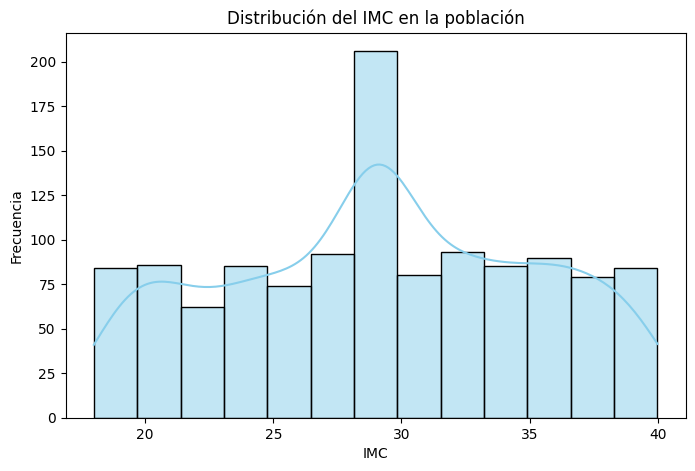

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df_salud['IMC'], kde=True, color='skyblue')
plt.title('Distribución del IMC en la población')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de la población tiene un IMC dentro del rango normal, pero hay presencia de valores altos (sobrepeso/obesidad).

2.	¿Cómo varía la presión arterial según el nivel de actividad física?

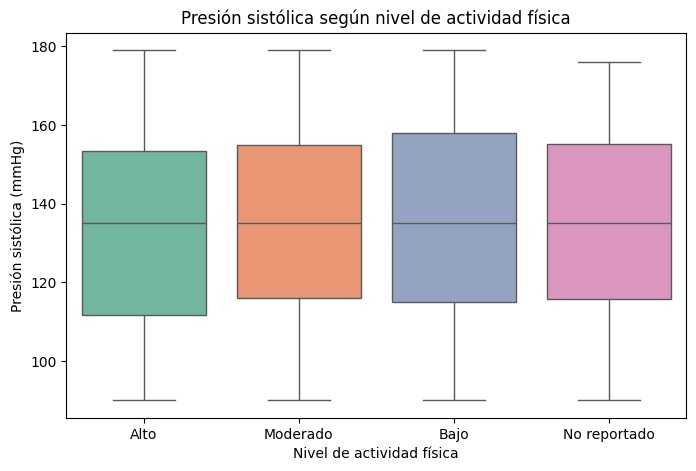

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Nivel_Actividad', y='Presion_Sistolica', data=df_salud, palette='Set2')
plt.title('Presión sistólica según nivel de actividad física')
plt.xlabel('Nivel de actividad física')
plt.ylabel('Presión sistólica (mmHg)')
plt.show()

Las personas con mayor actividad física tienden a tener una presión arterial más baja.

3.	¿Existe diferencias en el número de pasos diarios entre fumadores y no fumadores?

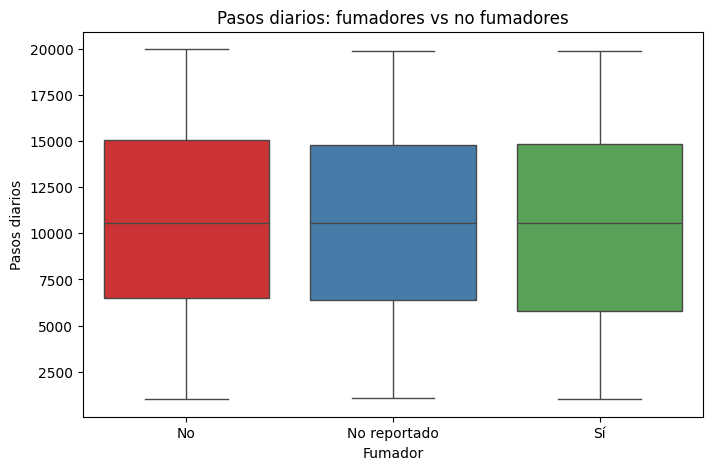

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Fumador', y='Pasos_Diarios', data=df_salud, palette='Set1')
plt.title('Pasos diarios: fumadores vs no fumadores')
plt.xlabel('Fumador')
plt.ylabel('Pasos diarios')
plt.show()

Los no fumadores suelen dar más pasos diarios que los fumadores.

4.	¿Cómo se relaciona el número de horas de sueño con la satisfacción con la vida?

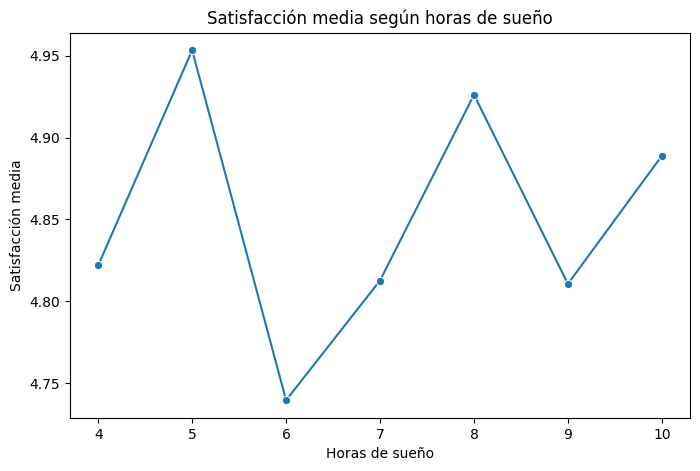

In [26]:
media_satisfaccion = df_salud.groupby('Horas_Sueno')['Satisfaccion_Vida'].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x=media_satisfaccion.index, y=media_satisfaccion.values, marker='o') #'o' para círculos, 's' para cuadrados, '^' para triángulos, '.' para puntos
plt.title('Satisfacción media según horas de sueño')
plt.xlabel('Horas de sueño')
plt.ylabel('Satisfacción media')
plt.show()

Patrón irregular donde 5 horas tiene la máxima satisfacción (4.95) y 6 horas presenta la mínima (4.74), lo cual no coincide con las recomendaciones médicas estándar.

## Estadística Inferencial

In [28]:
# finalmente, al ser simétrica hacemos una prueba de hipótesis con t de Student para comparar promedio de la satisfacción con la vida entre los grupos 'fumadores' y 'no fumadores'
grupo_fumador = df_salud[df_salud['Fumador'] == 'Sí']['Satisfaccion_Vida']
grupo_no_fumador = df_salud[df_salud['Fumador'] == 'No']['Satisfaccion_Vida']

t_stat, p_value = ttest_ind(grupo_fumador, grupo_no_fumador, equal_var=False)
print("t-statistic:", round(t_stat, 2)) #redondeamos a 2 decimales
print("p-value:", round(p_value, 2))

if p_value < 0.05:
    print("Hay diferencia significativa en la satisfacción con la vida entre fumadores y no fumadores.")
else:
    print("No hay diferencia significativa en la satisfacción con la vida entre fumadores y no fumadores.")

t-statistic: -0.33
p-value: 0.74
No hay diferencia significativa en la satisfacción con la vida entre fumadores y no fumadores.


El resultado de p-value es 0.9, lo que indica que no hay una diferencia significativa en la satisfacción con la vida entre fumadores y no fumadores, ya que es mayor que 0.05. Para determinar cuál grupo está más satisfecho tenemos t-statistic con -0.12, que al ser negativo señala que la media de satisfacción es ligeramente menor en el primer grupo (fumadores) que en el segundo (no fumadores).